In [2]:
#note: this was made in colab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import model_selection
from mlxtend.plotting import plot_learning_curves

In [3]:
#Classification Type: Binary Classification
#Algorithms used: Decision Tree, k-nearest neighbours, Naive Bayes
GRBV=pd.read_csv('voice.csv')

In [4]:
#Data set before turning label column into numerical units
GRBV

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [5]:
#Putting the labels into a numerical form and fitting them into the column
d = {'male': 0, 'female': 1}
GRBV['label']=GRBV['label'].map(d)
#Sorting the dataset into columns used for predictions and the column to be checked from
features = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']
X=GRBV[features]
Y=GRBV['label']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.05,random_state=42)
#Note: only 30% was used because the higher the higher the testing set size the lower the accuracy
#Random state is 42 because that's the default on the scikit documentation

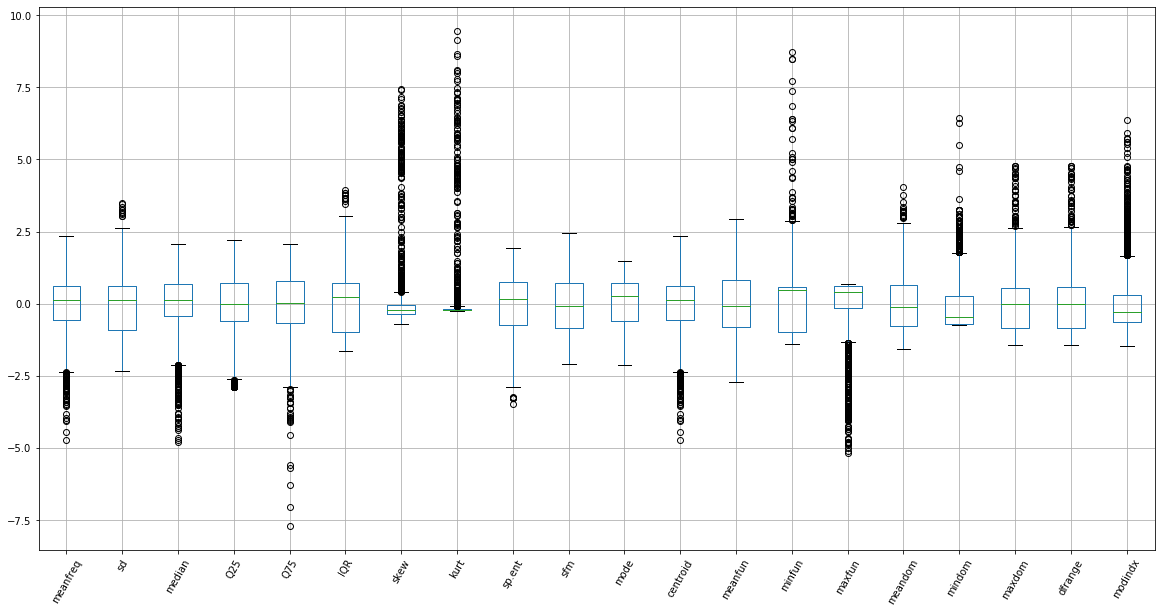

In [6]:
# Distribution & Descriotion Of Outliers  
from sklearn.preprocessing import scale #Centre to the mean then divide by the Std. dev. 
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
GRBV_x=GRBV[features]
scaled_X = pd.DataFrame(scale(GRBV_x), columns=GRBV_x.columns)
scaled_X.boxplot(ax=ax, rot=60)
plt.show()

In [7]:
print(X)
print(Y)

      meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm      mode  ce

In [8]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

NameError: name 'pydotplus' is not defined

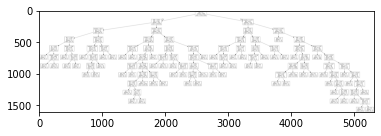

In [72]:
dtree = dtree.fit(X_train, Y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

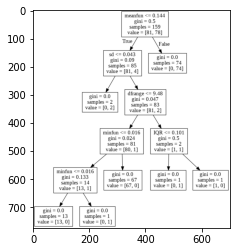

In [71]:
dtree = dtree.fit(X_test, Y_test)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree3.png')
img=pltimg.imread('mydecisiontree3.png')
imgplot = plt.imshow(img)

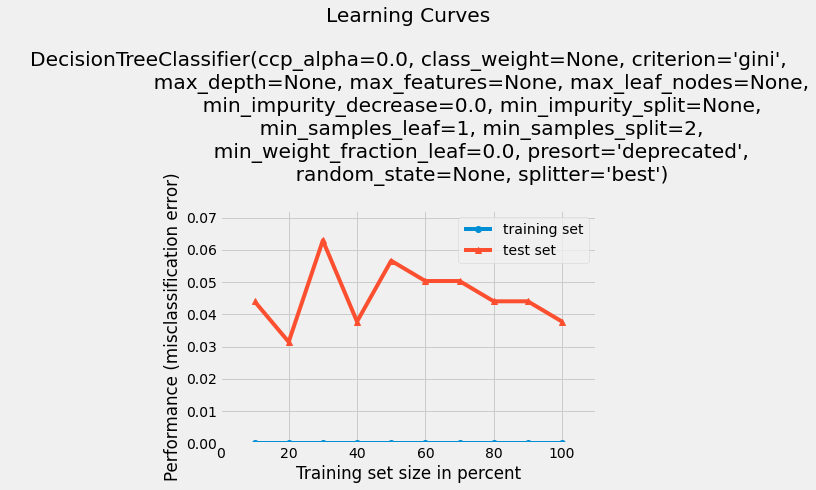

In [57]:
plot_learning_curves(X_train, Y_train, X_test, Y_test, dtree)
plt.show()

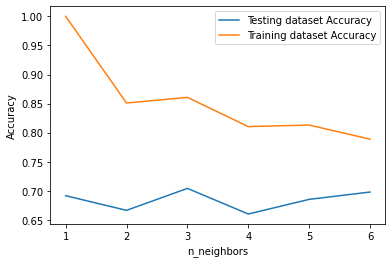

array([0.6918239 , 0.66666667, 0.70440252, 0.66037736, 0.68553459,
       0.69811321])

In [49]:
#K-nearest neighbour
#Creating percentages for graph
neighbors = np.arange(1, 7) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

# Loop over K values
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, Y_train) 
    test_accuracy[i] = knn.score(X_test, Y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()
test_accuracy

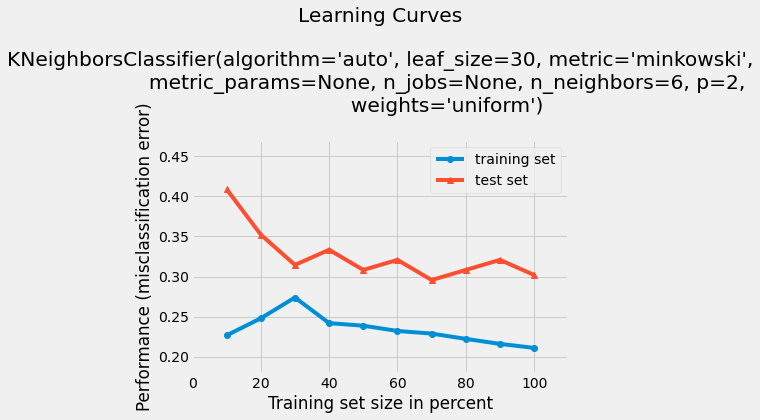

In [59]:
#Visualization of learning curve for KNN
plot_learning_curves(X_train, Y_train, X_test, Y_test, knn)
plt.show()

In [51]:
#Naive Bayes Algorithm
Naive = GaussianNB() 
Naive.fit(X_train, Y_train)
Y_pred = Naive.predict(X_test)
last=metrics.accuracy_score(Y_test, Y_pred)
last

0.8930817610062893

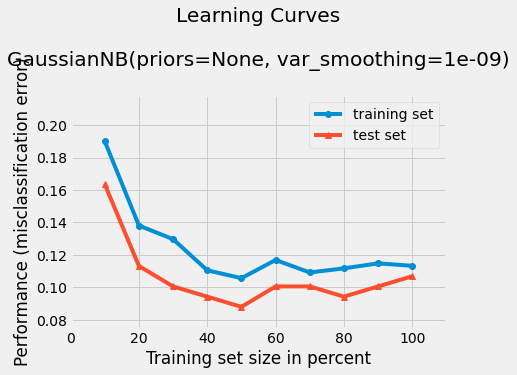

In [58]:
#Visualizing learning curve of Naive Bayes
plot_learning_curves(X_train, Y_train, X_test, Y_test, Naive)
plt.show()